# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Exercise 06


*How to run the code:*
1. *In the file `input.dat` make sure the value of $h$ (third line) is 0.0 and the value of $metro$ (fourth line) is 1*
2. *Run `simulation.sh`*
3. *Change the value of $h$ in `input.dat` from 0.0 to 0.02*
4. *Run `simulation.sh`* 
5. *Change the value of $metro$ in `input.dat` from 1 to 0*
6. *Run `simulation.sh`* 
7. *Change back the value of $h$ in `input.dat` from 0.02 to 0.0*
8. *Run `simulation.sh`*

*Before running the code, please empty the directories from the previous data, running `clean.sh` inside this directory or inside the single directories `Metro` and `Gibbs`*


The aim of this axercise is to modify a given code to simulate a **one-dimensional ferromagnetic system**, according to the **Ising model**.

I simulated a system with $N=50$ spins, taking values in $\{-1; 1\}$, in LJ units (so that $\mu_B=1$ and $k_B=1$), considering the **nearest neighbours interaction**. The hamiltonian is:
$$H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$
where $J>0$ is an interaction parameter and $h$ is the external magnetic field.
I worked in **periodic boundary conditions** (so that $s_{N+1} = s_{1}$), with $J=1$ and $h$ being either $0.0$ or $0.02$ .

I made the simulations at 11 different temperatures, equally spaced between $0.5$ and $2.0$ ($\delta T = 0.15$), and I used them to calculate four different thermodynamic quantities:

1. **Internal energy**: $U(N,T) = \langle H \rangle_{h=0}$
2. **Heat capacity**: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$
3. **Magnetization**: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$
4. **Magnetic susceptibility**: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$


#### Algorithms

I made use of two different algorithms to sample the **Boltzmann weight** ($p = \frac{exp (-\beta H)}{Z}$, where $\beta = \frac{1}{T}$ and $Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right)$) and make a Monte Carlo step (here, the attempt to **flip N=50 spins**, not necessarily all different, is considered a step):
1. The **Metropolis** algorithm: here, the proposed move is to flip one spin, chosen randomly every time. The move is accepted if a random number $r\in [0, 1]$ is lesser than or equal to 
$$A({y}|{x})=\min[1, \frac{p(y)}{p(x)}]=\min[1, \exp \left( -\beta (E_y-E_x)\right)]$$
where $y$ is the situation in which the spin is flipped, $x$ is the situation in which the spin is not flipped.
2. The **Gibbs** algorithm: here, the move is always accepted. After choosing randomly one spin, its future value is decided by the conditional probability defined by the other spins, regardless of its actual value. The conditional probability is calculated as : 
$$p (s_i = \pm 1| s_j : j \neq i ) = \frac{1}{1+\exp(-\beta \Delta E)}$$
where $\Delta E= \pm 2 \left[ J(S_{i-1} + S_{i+1})\pm h \right]$.

#### Equilibration

Both the algorithms tend only asymptotically to the wanted distribution, therefore some **equilibration steps** are needed before starting the actual simulation. 
I made 200 equilibration steps and I plotted the evolution of the internal energy and of the spin configuration during the equilibration process, at three different temperatures ($T=0.5$, $T=1.25$, $T=2.0$).
The graphs below show that 200 steps are way enough to equilibrate the system, even for $T=0.5$, which takes the longest to equilibrate (in fact, we start from a $T=\infty$ configuration).


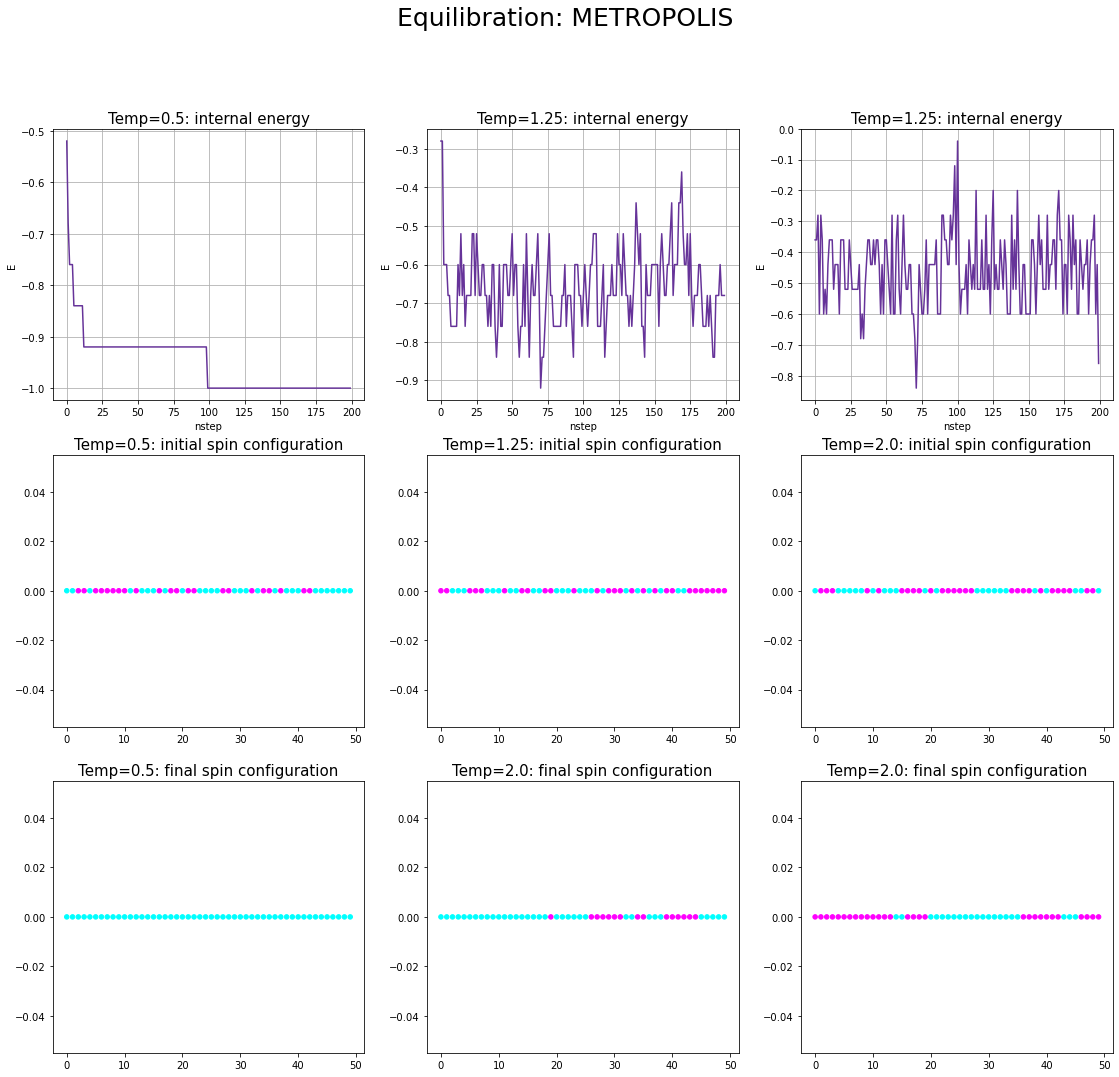

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

figure = plt.figure (figsize=(19, 17))
plt.suptitle ("Equilibration: METROPOLIS", fontsize = 25)

#T=0.5
plt.subplot(3, 3, 1)
ene = np.loadtxt ("Metro/equi.ene_T0.500000_M0.000000", unpack = "true")
plt.plot(ene, color = "rebeccapurple")
plt.grid(True)
plt.title ("Temp=0.5: internal energy", fontsize = 15)
plt.ylabel ("E")
plt.xlabel ("nstep")

plt.subplot(3, 3, 4)
x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("Metro/config.i_T0.500000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='cool', marker='o', alpha=2)
plt.title ("Temp=0.5: initial spin configuration", fontsize = 15)

plt.subplot(3, 3, 7)
y =np.loadtxt("Metro/config.f_T0.500000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='cool', marker='o', alpha=2)
plt.title ("Temp=0.5: final spin configuration", fontsize = 15)

#T=1.25
plt.subplot(3, 3, 2)
ene = np.loadtxt ("Metro/equi.ene_T1.250000_M0.000000", unpack = "true")
plt.plot(ene, color = "rebeccapurple")
plt.grid(True)
plt.title ("Temp=1.25: internal energy", fontsize = 15)
plt.ylabel ("E")
plt.xlabel ("nstep")

plt.subplot(3, 3, 5)
x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("Metro/config.i_T1.250000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='cool', marker='o', alpha=2)
plt.title ("Temp=1.25: initial spin configuration", fontsize = 15)

plt.subplot(3, 3, 8)
y =np.loadtxt("Metro/config.f_T1.250000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='cool', marker='o', alpha=2)
plt.title ("Temp=2.0: final spin configuration", fontsize = 15)

#T=2.0
plt.subplot(3, 3, 3)
ene = np.loadtxt ("Metro/equi.ene_T2.000000_M0.000000", unpack = "true")
plt.plot(ene, color = "rebeccapurple")
plt.grid(True)
plt.title ("Temp=1.25: internal energy", fontsize = 15)
plt.ylabel ("E")
plt.xlabel ("nstep")

plt.subplot(3, 3, 6)
x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("Metro/config.i_T2.000000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='cool', marker='o', alpha=2)
plt.title ("Temp=2.0: initial spin configuration", fontsize = 15)

plt.subplot(3, 3, 9)
y =np.loadtxt("Metro/config.f_T2.000000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='cool', marker='o', alpha=2)
plt.title ("Temp=2.0: final spin configuration", fontsize = 15)


plt.show()

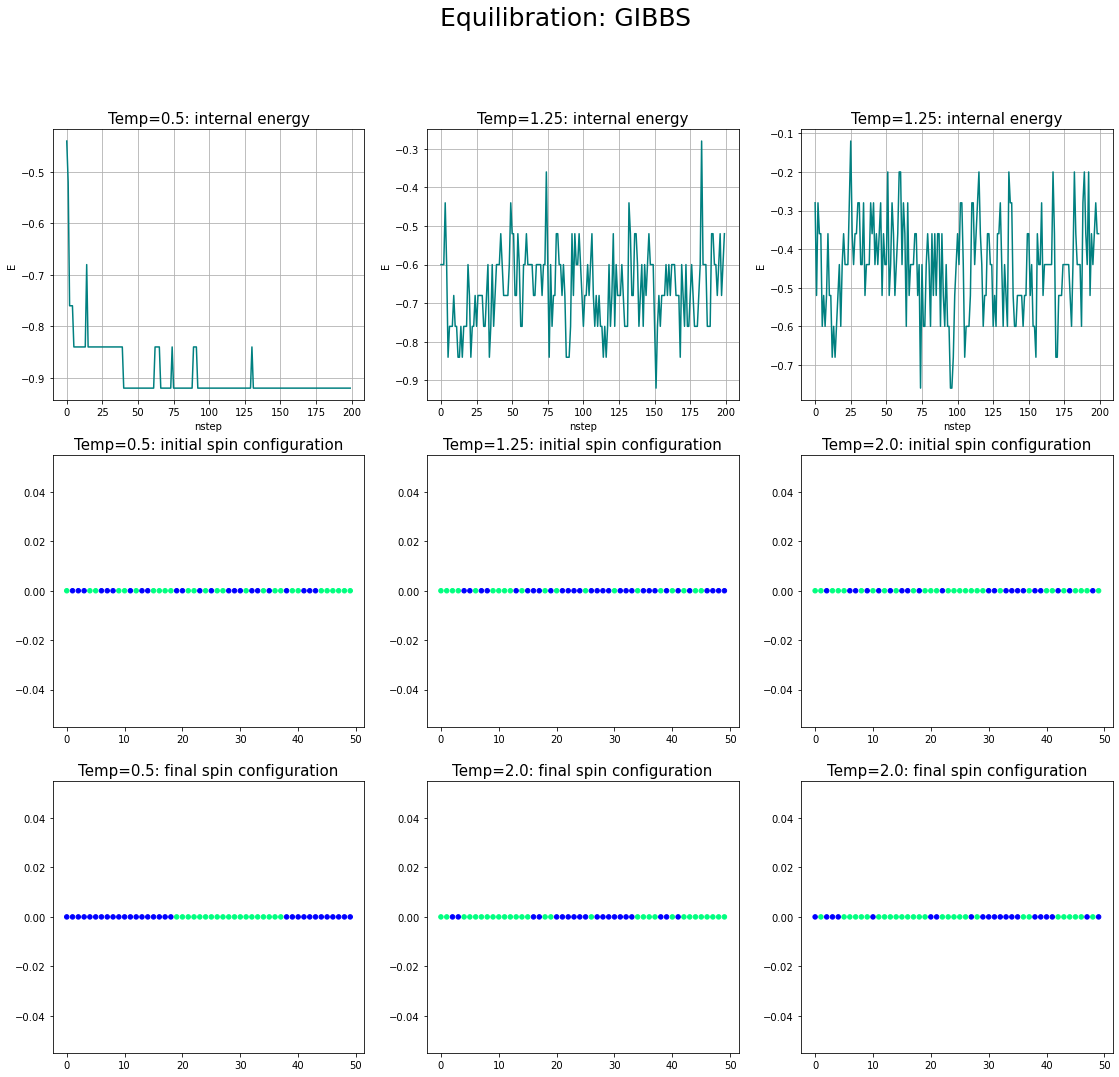

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

figure = plt.figure (figsize=(19, 17))
plt.suptitle ("Equilibration: GIBBS", fontsize = 25)

#T=0.5
plt.subplot(3, 3, 1)
ene = np.loadtxt ("Gibbs/equi.ene_T0.500000_M0.000000", unpack = "true")
plt.plot(ene, color = "teal")
plt.grid(True)
plt.title ("Temp=0.5: internal energy", fontsize = 15)
plt.ylabel ("E")
plt.xlabel ("nstep")

plt.subplot(3, 3, 4)
x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("Gibbs/config.i_T0.500000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='winter', marker='o', alpha=2)
plt.title ("Temp=0.5: initial spin configuration", fontsize = 15)

plt.subplot(3, 3, 7)
y =np.loadtxt("Gibbs/config.f_T0.500000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='winter', marker='o', alpha=2)
plt.title ("Temp=0.5: final spin configuration", fontsize = 15)

#T=1.25
plt.subplot(3, 3, 2)
ene = np.loadtxt ("Gibbs/equi.ene_T1.250000_M0.000000", unpack = "true")
plt.plot(ene, color = "teal")
plt.grid(True)
plt.title ("Temp=1.25: internal energy", fontsize = 15)
plt.ylabel ("E")
plt.xlabel ("nstep")

plt.subplot(3, 3, 5)
x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("Gibbs/config.i_T1.250000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='winter', marker='o', alpha=2)
plt.title ("Temp=1.25: initial spin configuration", fontsize = 15)

plt.subplot(3, 3, 8)
y =np.loadtxt("Gibbs/config.f_T1.250000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='winter', marker='o', alpha=2)
plt.title ("Temp=2.0: final spin configuration", fontsize = 15)

#T=2.0
plt.subplot(3, 3, 3)
ene = np.loadtxt ("Gibbs/equi.ene_T2.000000_M0.000000", unpack = "true")
plt.plot(ene, color = "teal")
plt.grid(True)
plt.title ("Temp=1.25: internal energy", fontsize = 15)
plt.ylabel ("E")
plt.xlabel ("nstep")

plt.subplot(3, 3, 6)
x=np.arange(0, 50, 1.0)
val=[0] * 50
y =np.loadtxt("Gibbs/config.i_T2.000000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='winter', marker='o', alpha=2)
plt.title ("Temp=2.0: initial spin configuration", fontsize = 15)

plt.subplot(3, 3, 9)
y =np.loadtxt("Gibbs/config.f_T2.000000_M0.000000", unpack=True)
plt.scatter(x, val, s=20, c=y, cmap='winter', marker='o', alpha=2)
plt.title ("Temp=2.0: final spin configuration", fontsize = 15)




plt.show()

#### Simulation 

After the equilibration I started the simulation.
At every temperature the averages were computed using **data blocking**, with $M=10^6 $ steps and $N=10^2 $ blocks.
The uncertainties of the heat capacity and of the magnetic susceptibility were calculated using the partial derivative formulas for the propagation of errors.

Since the 1D Ising model is **analitically resoluble**, I could compare my results with the exact solutions.
As the graphs below show, both the Metropolis algorithm and the Gibbs algorithm provide good results: the values resulting from the simulation are compatible with the theoretical values. I noticed that at lower temperatures the discrepance increases, but the values are still compatible, and that Gibbs algorithm produces slightly less precise results.

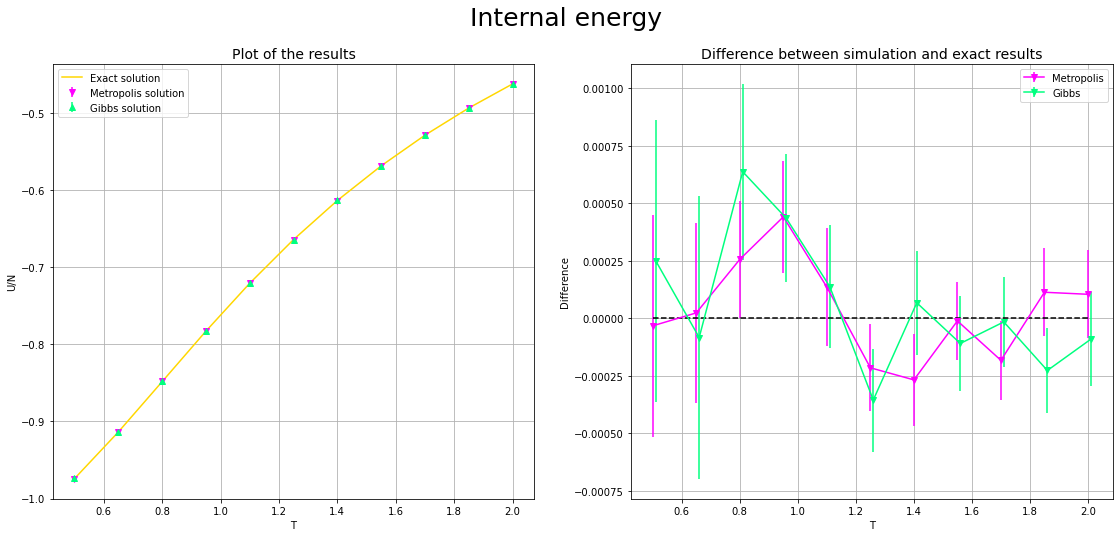

In [3]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

figure = plt.figure (figsize=(19, 8))
plt.suptitle ("Internal energy", fontsize = 25)

#Plotting results
plt.subplot (1, 2, 1)

#Analytical solution
points=11
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label="Exact solution", color="gold")

#METROPOLIS
tempM, eneM, errM = np.loadtxt ( "Metro/output.final_M0.000000", unpack=True, usecols=(0,1,2))
plt.errorbar (tempM, eneM, yerr=errM, fmt = 'v', label="Metropolis solution", color="magenta")

#GIBBS
tempG, eneG, errG = np.loadtxt ( "Gibbs/output.final_M0.000000", unpack=True, usecols=(0,1,2))
plt.errorbar (tempG, eneG, yerr=errG, fmt = '^', label="Gibbs solution", color="springgreen")




plt.xlabel('T')
plt.ylabel('U/N')
plt.title("Plot of the results", fontsize=14)
plt.legend()
plt.grid(True)

####################################################################
#Plotting differences
plt.subplot (1, 2, 2)

#METROPOLIS
diffM = eneM - e
plt.errorbar(tempM, diffM, yerr=errM, color="magenta", label="Metropolis", marker="v")

#GIBBS
diffG = eneG - e
tempG = tempG + 0.01
plt.errorbar(tempG, diffG, yerr=errG, color="springgreen", label="Gibbs", marker="v")



plt.xlabel('T')
plt.ylabel('Difference')
plt.title("Difference between simulation and exact results", fontsize=14)
plt.hlines(0, 0.5, 2, color="black", linestyle="dashed")
plt.legend()
plt.grid(True)


plt.show()

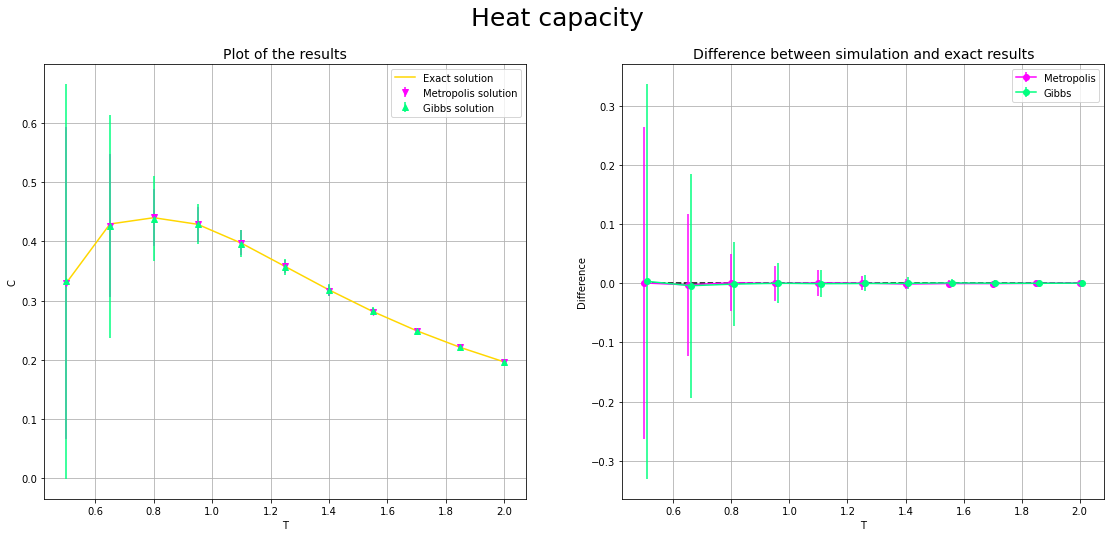

In [4]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

figure = plt.figure (figsize=(19, 8))
plt.suptitle ("Heat capacity", fontsize = 25)

#Plotting results
plt.subplot (1, 2, 1)

#Analytical solution
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label="Exact solution", color="gold")

#METROPOLIS
tempM, heatM, errM = np.loadtxt ( "Metro/output.final_M0.000000", unpack=True, usecols=(0,3,4))
plt.errorbar (tempM, heatM, yerr=errM, fmt = 'v', label="Metropolis solution", color="magenta")

#GIBBS
tempG, heatG, errG = np.loadtxt ( "Gibbs/output.final_M0.000000", unpack=True, usecols=(0,3,4))
plt.errorbar (tempG, heatG, yerr=errG, fmt = '^', label="Gibbs solution", color="springgreen")


plt.xlabel('T')
plt.ylabel('C')
plt.title("Plot of the results", fontsize=14)
plt.legend()
plt.grid(True)

##########################################################
#Plotting differences
plt.subplot (1, 2, 2)

#METROPOLIS
diffM = heatM - heat
plt.errorbar(tempM, diffM, yerr=errM, color="magenta", label="Metropolis", marker="o")

#GIBBS
diffG = heatG - heat
tempG = tempG + 0.01
plt.errorbar(tempG, diffG, yerr=errG, color="springgreen", label="Gibbs", marker="o")



plt.xlabel('T')
plt.ylabel('Difference')
plt.title("Difference between simulation and exact results", fontsize=14)
plt.hlines(0, 0.5, 2, color="black", linestyle="dashed")
plt.legend()
plt.grid(True)


plt.show()

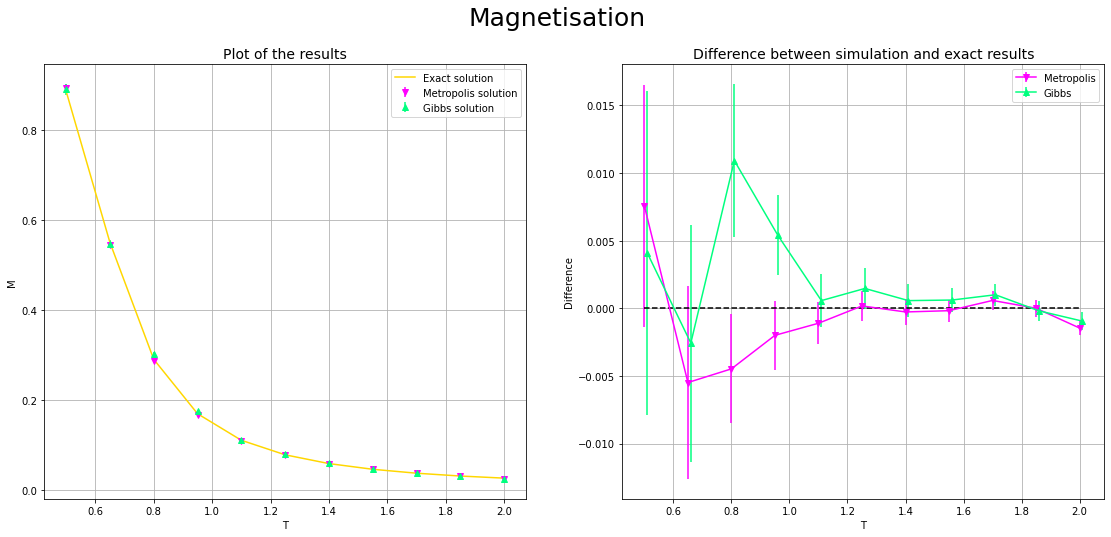

In [5]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

figure = plt.figure (figsize=(19, 8))
plt.suptitle ("Magnetisation", fontsize = 25)

#Plotting results
plt.subplot (1, 2, 1)

#Analytical solution
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label="Exact solution", color="gold")

#METROPOLIS
tempM, magM, errM = np.loadtxt ( "Metro/output.final_M0.020000", unpack=True, usecols=(0,5,6))
plt.errorbar (tempM, magM, yerr=errM, fmt = 'v', label="Metropolis solution", color="magenta")

#GIBBS
tempG, magG, errG = np.loadtxt ( "Gibbs/output.final_M0.020000", unpack=True, usecols=(0,5,6))
plt.errorbar (tempG, magG, yerr=errG, fmt = '^', label="Gibbs solution", color="springgreen")

plt.xlabel('T')
plt.ylabel('M')
plt.title("Plot of the results", fontsize=14)
plt.legend()
plt.grid(True)

#################################################################
#Plotting differences
plt.subplot (1, 2, 2)

#METROPOLIS
diffM = magM - M
plt.errorbar(tempM, diffM, yerr=errM, color="magenta", label="Metropolis", marker="v")

#GIBBS
diffG = magG - M 
tempG = tempG + 0.01
plt.errorbar(tempG, diffG, yerr=errG, color="springgreen", label="Gibbs", marker="^")

plt.xlabel('T')
plt.ylabel('Difference')
plt.title("Difference between simulation and exact results", fontsize=14)
plt.hlines(0, 0.5, 2, color="black", linestyle="dashed")
plt.legend()
plt.grid(True)

plt.show()

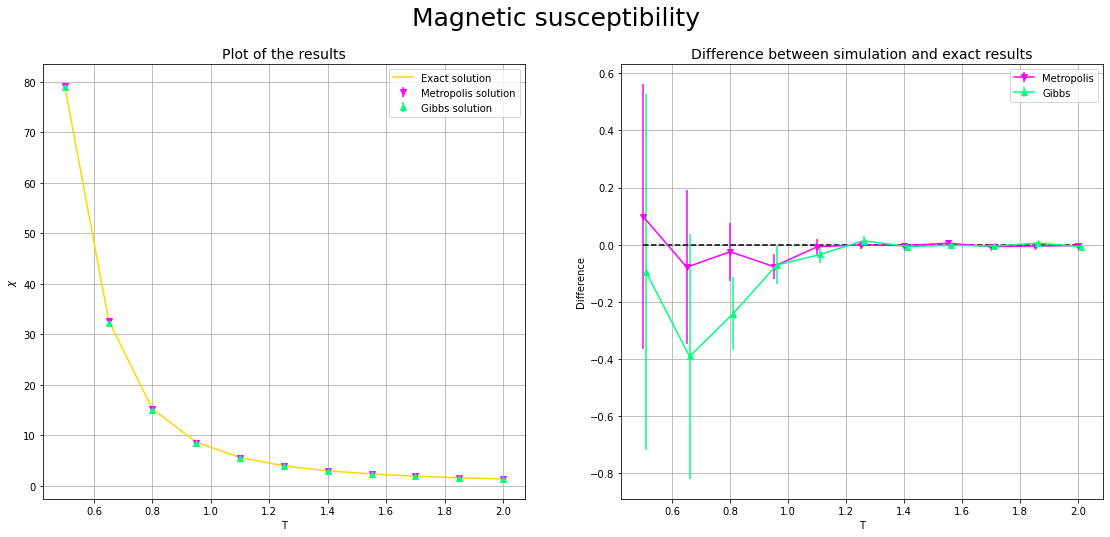

In [6]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

figure = plt.figure (figsize=(19, 8))
plt.suptitle ("Magnetic susceptibility", fontsize = 25)

#Plotting results
plt.subplot (1, 2, 1)

#Analytical solution
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label="Exact solution", color="gold")

#METROPOLIS
tempM, chiM, errM = np.loadtxt ( "Metro/output.final_M0.000000", unpack=True, usecols=(0,7,8))
plt.errorbar (tempM, chiM, yerr=errM, fmt = 'v', label="Metropolis solution", color="magenta")

#GIBBS
tempG, chiG, errG = np.loadtxt ( "Gibbs/output.final_M0.000000", unpack=True, usecols=(0,7,8))
plt.errorbar (tempG, chiG, yerr=errG, fmt = '^', label="Gibbs solution", color="springgreen")


plt.xlabel('T')
plt.ylabel('$\chi$')
plt.title("Plot of the results", fontsize=14)
plt.legend()
plt.grid(True)

##################################################
#Plotting differences
plt.subplot (1, 2, 2)

#METROPOLIS
diffM = chiM - X
plt.errorbar(tempM, diffM, yerr=errM, color="magenta", label="Metropolis", marker="v")

#GIBBS
diffG = chiG - X
tempG = tempG + 0.01
plt.errorbar(tempG, diffG, yerr=errG, color="springgreen", label="Gibbs", marker="^")


plt.xlabel('T')
plt.ylabel('Difference')
plt.title("Difference between simulation and exact results", fontsize=14)
plt.hlines(0, 0.5, 2, color="black", linestyle="dashed")
plt.legend()
plt.grid(True)





plt.show()

